In [1]:
################################################
# Welcome to Module 6: Data Analysis in Pandas

# -- Contents --
# 1. DATA DESCRIPTIONS AND AGGREGATIONS
# 2. GROUPED AGGREGATIONS
# 3. SORTING AND FILTERING
# 4. TABLE JOINS
# 4. ADVANCED STATISTICAL METHODS
# 5. TRANSFORMING DATAFRAMES
# 6. VISUALIZING DATA
# 7. ACTIVITIES

################################################


########################
# 1. DATA DESCRIPTIONS AND AGGREGATIONS
########################


##########
## 1.1 SETUP
##########

In [2]:
# First, we'll import several libraries
import pandas as pd
import pickle

In [3]:
# Then, we'll load the 2 dataframes that we'll be working with
# The first is the same sales dataset that we worked with in Module 5
pickle_file_path = './data/sales_df.pickle'
with open(pickle_file_path, 'rb') as handle:
    sales_df = pickle.load(handle)

# The second is a customer dataset that has customer information
pickle_file_path = './data/customers_data.pickle'
with open(pickle_file_path, 'rb') as handle:
    customer_df = pickle.load(handle)

In [4]:
# Also the same as Module 5, we'll force Pandas to show all of the columns when printing
pd.set_option('display.max_columns', 1000) # Now we will see up to 1000 columns
pd.set_option('display.max_colwidth', 1000) # And we will see up to 1000 characters in each column

In [5]:
sales_df = pd.read_csv('./data/sales_data_all.csv')

In [6]:
customer_df = pd.read_csv('./data/customers_data.csv')

##########
## 1.2 DATA DESCRIPTIONS
##########

In [7]:
# We can use the .describe() function to view some general statistics about each column in a dataframe
# Let's look at the sales dataframe
sales_description = sales_df.describe()
sales_description

,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_cost,product_price,product_category_key
count,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000
mean,438.962103,18843.645559,6.254666,1.903151,1.501873,23.412982,255.750403,438.969347,3.102576
std,118.612352,5412.449843,2.958005,1.021006,0.612379,13.493235,496.192920,838.650049,1.258273
min,214.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,0.856500,2.290000,1.000000
25%,360.000000,14016.000000,4.000000,1.000000,1.000000,19.000000,2.973300,7.950000,3.000000
50%,479.000000,18157.000000,7.000000,2.000000,1.000000,28.000000,11.216300,29.990000,4.000000
75%,529.000000,23425.750000,9.000000,2.000000,2.000000,37.000000,59.466000,159.000000,4.000000
max,606.000000,29483.000000,10.000000,8.000000,3.000000,37.000000,2171.294200,3578.270000,4.000000


In [8]:
# Now let's look at the customer dataframe
cust_description = customer_df.describe()
cust_description

,customer_key,total_children
count,18148.000000,18148.000000
mean,20247.470465,1.843619
std,5336.245656,1.613203
min,11000.000000,0.000000
25%,15626.750000,0.000000
50%,20252.500000,2.000000
75%,24868.250000,3.000000
max,29483.000000,5.000000


In [9]:
# To determine the data type of each column, we can use the .dtypes function
# Note: Strings will show as 'object'
dtypes = sales_df.dtypes
dtypes

order_date                  object
stock_date                  object
order_number                object
product_key                  int64
customer_key                 int64
territory_key                int64
order_line_item              int64
order_quantity               int64
product_subcategory_key      int64
product_sku                 object
product_name                object
model_name                  object
product_description         object
product_color               object
product_size                object
product_style               object
product_cost               float64
product_price              float64
subcategory_name            object
product_category_key         int64
category_name               object
dtype: object

##########
## 1.3 AGGREGATIONS
##########

In [10]:
# There are many built-in aggregation function we can use to compute individual column statistics
# These include, but are not limited to: count, sum, mean, median, mode, min, max, abs, prod, std, var 
# Note: Some of these statistics are the same as what we see when we use the .describe() function

# We can use .count() to tell us the number of rows in each column containing non-NA values
count = sales_df.count()
count

order_date                 56046
stock_date                 56046
order_number               56046
product_key                56046
customer_key               56046
territory_key              56046
order_line_item            56046
order_quantity             56046
product_subcategory_key    56046
product_sku                56046
product_name               56046
model_name                 56046
product_description        56046
product_color              29168
product_size               56046
product_style              56046
product_cost               56046
product_price              56046
subcategory_name           56046
product_category_key       56046
category_name              56046
dtype: int64

In [11]:
# For all of these aggregation functions, we can also apply them to a subset of columns
selection = sales_df[['customer_key', 'product_key']]
count = selection.count()
print(count)

customer_key    56046
product_key     56046
dtype: int64


In [12]:
# We can use .sum() to sum all of the values in each column
selection = sales_df['product_cost']
my_sum = selection.sum() # Note: We cannot call our variable 'sum' because that is a reserved Python keyword
print(my_sum)

14333787.073800001


In [13]:
# We can also use the .agg() function to compute multiple statistics on 1 or more columns at once
# Note: This is similar to what the .describe() function does, but it allows us to specify the stats we want
stats = sales_df['product_cost'].agg(['count', 'sum', 'mean', 'std', 'min', 'max'])
print(stats)

count    5.604600e+04
sum      1.433379e+07
mean     2.557504e+02
std      4.961929e+02
min      8.565000e-01
max      2.171294e+03
Name: product_cost, dtype: float64


########################
# 2. GROUPED AGGREGATIONS
########################

##########
## 2.1 BASIC GROUPED AGGREGATIONS
##########

In [14]:
# Rather than computing column statistics that consider each row individually, 
#   we can group rows based on one of their column values using the .groupby() function
# Then, we can compute statistics for each group

# We'll start with a simple example: grouping and computing a single metric
grouped_data = sales_df.groupby('product_name')
count = grouped_data['order_quantity'].agg('count') # Count number of rows in each group with non-NA values for 'OrderQuantity'
count

product_name
AWC Logo Cap                  2062
All-Purpose Bike Stand         234
Bike Wash - Dissolver          850
Classic Vest, L                182
Classic Vest, M                182
                              ... 
Touring-3000 Yellow, 62         48
Water Bottle - 30 oz.         3983
Women's Mountain Shorts, L     334
Women's Mountain Shorts, M     327
Women's Mountain Shorts, S     283
Name: order_quantity, Length: 130, dtype: int64

In [15]:
# We can accomplish the same thing in a more compact way
count = sales_df.groupby('product_name')['order_quantity'].agg('count')
print(count)

product_name
AWC Logo Cap                  2062
All-Purpose Bike Stand         234
Bike Wash - Dissolver          850
Classic Vest, L                182
Classic Vest, M                182
                              ... 
Touring-3000 Yellow, 62         48
Water Bottle - 30 oz.         3983
Women's Mountain Shorts, L     334
Women's Mountain Shorts, M     327
Women's Mountain Shorts, S     283
Name: order_quantity, Length: 130, dtype: int64


In [16]:
# Similar to what we saw in the previous section, we can compute multiple metrics at once
# Group and compute
stats = sales_df.groupby('product_name')['order_quantity'].agg(['count', 'sum', 'mean', 'std', 'min', 'max']) 
stats.head()

,count,sum,mean,std,min,max
product_name,,,,,,
AWC Logo Cap,2062,4151,2.013094,0.505499,1,3
All-Purpose Bike Stand,234,234,1.000000,0.000000,1,1
Bike Wash - Dissolver,850,1706,2.007059,0.502007,1,3
"Classic Vest, L",182,182,1.000000,0.000000,1,1
"Classic Vest, M",182,182,1.000000,0.000000,1,1


In [17]:
# We can use .reset_index() to move the 'product_name' from the index back to a regular column,
# and set the new row numbers as the index.
stats = stats.reset_index()
stats.head()

,product_name,count,sum,mean,std,min,max
0,AWC Logo Cap,2062,4151,2.013094,0.505499,1,3
1,All-Purpose Bike Stand,234,234,1.000000,0.000000,1,1
2,Bike Wash - Dissolver,850,1706,2.007059,0.502007,1,3
3,"Classic Vest, L",182,182,1.000000,0.000000,1,1
4,"Classic Vest, M",182,182,1.000000,0.000000,1,1


In [18]:
# Exercise
'''
1. Find the average product_cost for each product_name.
2. Find the sum of product_cost for 'AWC Logo Cap'
'''

"\n1. Find the average product_cost for each product_name.\n2. Find the sum of product_cost for 'AWC Logo Cap'\n"

##########
## 2.2 ADVANCED GROUPED AGGREGATIONS
##########

In [19]:
# For more complex aggregations, it's best to use your own aggregation function

# Here, we define a function that computes the 90th percentile value for a given data series
import numpy as np
def ninetieth_percentile(x):
  p = np.percentile(x, 90)
  return(p)

In [20]:
# Then, we can supply the function name as an input in the .agg() function
stats = sales_df.groupby('category_name')['product_price'] .agg(['min', ninetieth_percentile, 'max']).reset_index() 
stats.head()

,category_name,min,ninetieth_percentile,max
0,Accessories,2.2900,34.99,159.00
1,Bikes,539.9900,2443.35,3578.27
2,Clothing,8.6442,69.99,69.99


########################
# 3. SORTING AND FILTERING
########################

##########
## 3.1 SORTING
##########

In [21]:
# We can sort rows using the .sort_values() function
# Note: If sorting using multiple columns, the function first sorts by the left-most column provided
#       Then, rows are further sorted by the next column provided, etc.
#       This can handle cases where some column values are the same.
sorted_df = sales_df.sort_values(by = ['stock_date', 'product_name', 'product_size'], ascending=True) 
sorted_selection = sorted_df[['stock_date', 'product_name', 'product_size', 'model_name']]
sorted_selection.head()

,stock_date,product_name,product_size,model_name
395,1/1/2002,"Mountain-100 Silver, 48",48,Mountain-100
738,1/1/2002,"Road-150 Red, 44",44,Road-150
751,1/1/2002,"Road-150 Red, 44",44,Road-150
236,1/1/2002,"Road-150 Red, 48",48,Road-150
191,1/1/2002,"Road-150 Red, 52",52,Road-150


In [22]:
sorted_df = sorted_df.reset_index(drop = True)
sorted_df.head()

,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price,subcategory_name,product_category_key,category_name
0,3/7/2015,1/1/2002,SO45629,347,11892,9,1,1,1,BK-M82S-48,"Mountain-100 Silver, 48",Mountain-100,"Top-of-the-line competition mountain bike. Performance-enhancing options include the innovative HL Frame, super-smooth front suspension, and traction for all terrain.",Silver,48,U,1912.1544,3399.99,Mountain Bikes,1,Bikes
1,4/30/2015,1/1/2002,SO46013,311,11705,4,1,1,2,BK-R93R-44,"Road-150 Red, 44",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,44,U,2171.2942,3578.27,Road Bikes,1,Bikes
2,5/1/2015,1/1/2002,SO46110,311,12169,4,1,1,2,BK-R93R-44,"Road-150 Red, 44",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,44,U,2171.2942,3578.27,Road Bikes,1,Bikes
3,2/9/2015,1/1/2002,SO45398,312,15059,10,1,1,2,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.27,Road Bikes,1,Bikes
4,2/2/2015,1/1/2002,SO45356,313,19096,9,1,1,2,BK-R93R-52,"Road-150 Red, 52",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,52,U,2171.2942,3578.27,Road Bikes,1,Bikes


In [23]:
##########
# 3.2 FILTERING
##########
# Filtering rows is the equivalent of using `WHERE` in SQL.
# Note: Filtering occurs by requesting rows where a condition is `True`.

# First, we need to build a series of True/False values for each row 
# The value is true for each row where column 'CategoryName' has value 'Bikes'
wanted_category_name = 'Bikes' 
rows_tf = (sales_df['category_name'] == wanted_category_name)
rows_tf.head(20)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: category_name, dtype: bool

In [24]:
# Next, we use the True/False series to filter the dataframe
# The result of this funtion is a new dataframe with all of the rows that meet our filter condition
filtered_df = sales_df[rows_tf]
print('The original dataframe has %d rows' % len(sales_df))
print('The filtered dataframe has %d rows' % len(filtered_df))
filtered_df[['product_name', 'model_name', 'product_style']].head()

The original dataframe has 56046 rows
The filtered dataframe has 13929 rows


,product_name,model_name,product_style
0,"Road-650 Black, 58",Road-650,U
1,"Road-150 Red, 48",Road-150,U
2,"Mountain-100 Black, 44",Mountain-100,U
3,"Road-650 Black, 44",Road-650,U
4,"Road-150 Red, 48",Road-150,U


In [25]:
# Exercise
'''
Find all rows with product cost > 2000
'''

'\nFind all rows with product cost > 2000\n'

In [26]:
# We can accomplish the same filtering in a more compact way
wanted_category_name = 'Bikes' 
columns_wanted = ['product_name', 'model_name', 'product_style', 'subcategory_name']
filtered_df = sales_df[sales_df['category_name'] == wanted_category_name][columns_wanted]

print('The filtered dataframe has %d rows' % len(filtered_df))
filtered_df.head()

The filtered dataframe has 13929 rows


,product_name,model_name,product_style,subcategory_name
0,"Road-650 Black, 58",Road-650,U,Road Bikes
1,"Road-150 Red, 48",Road-150,U,Road Bikes
2,"Mountain-100 Black, 44",Mountain-100,U,Mountain Bikes
3,"Road-650 Black, 44",Road-650,U,Road Bikes
4,"Road-150 Red, 48",Road-150,U,Road Bikes


In [27]:
# We can also filter using compound conditions
wanted_category_name = 'Bikes' 
subcategory_name = 'Mountain Bikes'
columns_wanted = ['product_name', 'model_name', 'product_style', 'subcategory_name']
rows_tf = (sales_df['category_name'] == wanted_category_name) & (sales_df['subcategory_name'] == subcategory_name)

filtered_df = sales_df[rows_tf][columns_wanted]
print('The filtered dataframe has %d rows' % len(filtered_df))
filtered_df.head()

The filtered dataframe has 4706 rows


,product_name,model_name,product_style,subcategory_name
2,"Mountain-100 Black, 44",Mountain-100,U,Mountain Bikes
10,"Mountain-100 Silver, 42",Mountain-100,U,Mountain Bikes
12,"Mountain-100 Black, 48",Mountain-100,U,Mountain Bikes
14,"Mountain-100 Black, 44",Mountain-100,U,Mountain Bikes
19,"Mountain-100 Silver, 38",Mountain-100,U,Mountain Bikes


In [28]:
# Exercise
'''
Find all rows with category = Bikes, subcategory_name == Mountain Bikes, and product_cost between 1500 and 2000
'''

'\nFind all rows with category = Bikes, subcategory_name == Mountain Bikes, and product_cost between 1500 and 2000\n'

In [29]:
# Another type of filtering is considering only unique values, using the .drop_duplicates() function
# Here, we first sort the dataframe using the 'ProductName' and 'ModelName' columns

sorted_df = sales_df.sort_values(by = ['product_name', 'model_name'], ascending=True) 
print(sorted_df[['product_name', 'model_name', 'product_style']].head())

# Then, we drop all rows containing duplicate values in columns 'ProductName' and 'ModelName'
unique_sorted_df = sorted_df.drop_duplicates(['product_name', 'model_name']) 

# Now, let's look at the result
unique_sorted_df[['product_name', 'model_name', 'product_style']].head()

      product_name   model_name product_style
4388  AWC Logo Cap  Cycling Cap             U
4396  AWC Logo Cap  Cycling Cap             U
4419  AWC Logo Cap  Cycling Cap             U
4433  AWC Logo Cap  Cycling Cap             U
4469  AWC Logo Cap  Cycling Cap             U


,product_name,model_name,product_style
4388,AWC Logo Cap,Cycling Cap,U
4341,All-Purpose Bike Stand,All-Purpose Bike Stand,0
4535,Bike Wash - Dissolver,Bike Wash,0
4572,"Classic Vest, L",Classic Vest,U
4599,"Classic Vest, M",Classic Vest,U


In [30]:
unique_sorted_df[['product_name', 'model_name', 'product_style']].reset_index(drop = True).head()

,product_name,model_name,product_style
0,AWC Logo Cap,Cycling Cap,U
1,All-Purpose Bike Stand,All-Purpose Bike Stand,0
2,Bike Wash - Dissolver,Bike Wash,0
3,"Classic Vest, L",Classic Vest,U
4,"Classic Vest, M",Classic Vest,U


In [31]:
########################
# 4. TABLE JOINS
########################

##########
# 4.1 GETTING STARTED
##########

# Altough the  sales data (sales_df) has more rows than the customer data (customer_df), 
# the former has fewer unique customer_key's than the latter.

# inner and outer joins

# Sales data
print(len(sales_df['customer_key']))
print(len(sales_df['customer_key'].drop_duplicates()))

# Customer data
print(len(customer_df['customer_key']))
print(len(customer_df['customer_key'].drop_duplicates()))

56046
17416
18148
18148


In [32]:
sales_df.loc[:5, 'customer_key']

0    14657
1    29255
2    11455
3    26782
4    14947
5    29143
Name: customer_key, dtype: int64

In [33]:
customer_df.loc[:5, 'customer_key']

0    11000
1    11001
2    11002
3    11003
4    11004
5    11005
Name: customer_key, dtype: int64

In [34]:
x = np.asarray(sales_df.columns.to_list())
y = np.asarray(customer_df.columns.to_list())

np.intersect1d(x, y)

array(['customer_key'], dtype='<U23')

In [35]:
##########
# 4.2 INNER JOIN
##########

# Get the intersection of the Sales and customer entries with an identical customer_key

joined_df = pd.merge(   left=sales_df, right=customer_df,                 # Left and right dataframes
                        how='inner',                                      # Specify inner join
                        left_on='customer_key', right_on='customer_key',  # Join keys
                        suffixes=('_sales', '_cust')                      # To apply to overlapping column names
                    )

print('The joined df has %d unique customer_key values' % len(joined_df['customer_key'].drop_duplicates()))
joined_df.head()

The joined df has 17416 unique customer_key values


,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price,subcategory_name,product_category_key,category_name,prefix,first_name,last_name,birth_date,marital_status,gender,email_address,annual_income,total_children,education_level,occupation,home_owner
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,2,BK-R50B-58,"Road-650 Black, 58",Road-650,"Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",Black,58,U,413.1463,699.0982,Road Bikes,1,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
1,1/9/2017,11/22/2003,SO61768,485,14657,1,2,2,30,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,NaN,0,0,8.2205,21.9800,Fenders,4,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
2,1/9/2017,12/20/2003,SO61768,215,14657,1,3,1,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap-on visor.",Black,0,0,12.0278,33.6442,Helmets,4,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
3,1/9/2017,10/1/2003,SO61768,352,14657,1,1,1,1,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all levels of competition. Uses the same HL Frame as the Mountain-100.,Silver,38,U,1117.8559,2071.4196,Mountain Bikes,1,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
4,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,2,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.2700,Road Bikes,1,Bikes,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N


In [36]:
##########
# 4.3 LEFT JOIN
##########

# "Complement" the Sales data with the Customer dataset
# Some sales entries do not have a counterpart in the cust data. Look at the `_merge` column added by the 
# argument 'indicator=True' to see which rows from the sales data did not have a counterpart in the customer dataset
joined_df = pd.merge(   left=sales_df, right=customer_df, 
                        how='left',
                        left_on='customer_key', right_on='customer_key',
                        suffixes=('_sales', '_cust'),
                        indicator=True)
print('The joined df has %d unique customer_key values' % len(joined_df['customer_key'].drop_duplicates()))
joined_df.head()

The joined df has 17416 unique customer_key values


,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price,subcategory_name,product_category_key,category_name,prefix,first_name,last_name,birth_date,marital_status,gender,email_address,annual_income,total_children,education_level,occupation,home_owner,_merge
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,2,BK-R50B-58,"Road-650 Black, 58",Road-650,"Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",Black,58,U,413.1463,699.0982,Road Bikes,1,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,both
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,2,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.2700,Road Bikes,1,Bikes,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N,both
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,1,BK-M82B-44,"Mountain-100 Black, 44",Mountain-100,"Top-of-the-line competition mountain bike. Performance-enhancing options include the innovative HL Frame, super-smooth front suspension, and traction for all terrain.",Black,44,U,1898.0944,3374.9900,Mountain Bikes,1,Bikes,MR.,ROSS,SANZ,4/21/1974,M,M,ross38@adventure-works.com,"$100,000",0,High School,Management,Y,both
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,2,BK-R50B-44,"Road-650 Black, 44",Road-650,"Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",Black,44,U,413.1463,699.0982,Road Bikes,1,Bikes,MR.,SETH,LEWIS,9/25/1980,S,M,seth20@adventure-works.com,"$30,000",0,High School,Skilled Manual,N,both
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,2,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.2700,Road Bikes,1,Bikes,MR.,ALEJANDRO,CHEN,1/11/1965,S,M,alejandro4@adventure-works.com,"$20,000",2,High School,Manual,Y,both


In [37]:
##########
# 4.4 RIGHT JOIN
##########

# For each entry in the customer dataset, find all the sales which match on customer_key
# Look at the _merge column added by the argument 'indicator=True' 
#  to see which customer rows did not have a counterpart in the sales dataset.
joined_df = pd.merge(   left=sales_df, right=customer_df, 
                        how='right',
                        left_on='customer_key', right_on='customer_key',
                        suffixes=('_sales', '_cust'),
                        indicator=True)
print('The joined df has %d unique customer_key values' % len(joined_df['customer_key'].drop_duplicates()))
joined_df.head()

The joined df has 18148 unique customer_key values


,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price,subcategory_name,product_category_key,category_name,prefix,first_name,last_name,birth_date,marital_status,gender,email_address,annual_income,total_children,education_level,occupation,home_owner,_merge
0,1/1/2015,9/21/2001,SO45080,332.0,14657,1.0,1.0,1.0,2.0,BK-R50B-58,"Road-650 Black, 58",Road-650,"Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",Black,58,U,413.1463,699.0982,Road Bikes,1.0,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,both
1,1/9/2017,11/22/2003,SO61768,485.0,14657,1.0,2.0,2.0,30.0,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,NaN,0,0,8.2205,21.9800,Fenders,4.0,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,both
2,1/9/2017,12/20/2003,SO61768,215.0,14657,1.0,3.0,1.0,31.0,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap-on visor.",Black,0,0,12.0278,33.6442,Helmets,4.0,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,both
3,1/9/2017,10/1/2003,SO61768,352.0,14657,1.0,1.0,1.0,1.0,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all levels of competition. Uses the same HL Frame as the Mountain-100.,Silver,38,U,1117.8559,2071.4196,Mountain Bikes,1.0,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,both
4,1/1/2015,12/5/2001,SO45079,312.0,29255,4.0,1.0,1.0,2.0,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.2700,Road Bikes,1.0,Bikes,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N,both


In [38]:
# Exercise
'''
1. Find rows in the df created after right join that are only present in customer_df

HINT : _merge can have the values - 'both', 'left_only', 'right_only'

'''

"\n1. Find rows in the df created after right join that are only present in customer_df\n\nHINT : _merge can have the values - 'both', 'left_only', 'right_only'\n\n"

In [39]:
##########
# 4.5 OUTER JOIN
##########

# Keep all the customer_key's from both sales and customer datasets and attmpt to match each of them (left + right join).
# Look at the '_merge' column added by the argument 'indicator=True' to see which rows did not have a counterpart 
# in the other dataset.
joined_df = pd.merge(   left=sales_df, right=customer_df, 
                        how='outer',
                        left_on='customer_key', right_on='customer_key',
                        suffixes=('_sales', '_cust'))
print('The joined df has %d unique customer_key values' % len(joined_df['customer_key'].drop_duplicates()))
joined_df.head()

The joined df has 18148 unique customer_key values


,order_date,stock_date,order_number,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_sku,product_name,model_name,product_description,product_color,product_size,product_style,product_cost,product_price,subcategory_name,product_category_key,category_name,prefix,first_name,last_name,birth_date,marital_status,gender,email_address,annual_income,total_children,education_level,occupation,home_owner
0,1/1/2015,9/21/2001,SO45080,332.0,14657,1.0,1.0,1.0,2.0,BK-R50B-58,"Road-650 Black, 58",Road-650,"Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceleration we're famous for.",Black,58,U,413.1463,699.0982,Road Bikes,1.0,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
1,1/9/2017,11/22/2003,SO61768,485.0,14657,1.0,2.0,2.0,30.0,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,NaN,0,0,8.2205,21.9800,Fenders,4.0,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
2,1/9/2017,12/20/2003,SO61768,215.0,14657,1.0,3.0,1.0,31.0,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap-on visor.",Black,0,0,12.0278,33.6442,Helmets,4.0,Accessories,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
3,1/9/2017,10/1/2003,SO61768,352.0,14657,1.0,1.0,1.0,1.0,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all levels of competition. Uses the same HL Frame as the Mountain-100.,Silver,38,U,1117.8559,2071.4196,Mountain Bikes,1.0,Bikes,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
4,1/1/2015,12/5/2001,SO45079,312.0,29255,4.0,1.0,1.0,2.0,BK-R93R-48,"Road-150 Red, 48",Road-150,"This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.",Red,48,U,2171.2942,3578.2700,Road Bikes,1.0,Bikes,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N


In [40]:
########################
# 5. ADVANCED STATISTICAL METHODS
########################

##########
# 5.1 LAMBDA FUNCTIONS
##########

# Lambda functions are single-line functions that typically perform some time of data transformation 
# They can be used inside the .apply() function to very efficiently perform the same operation
# on each row in a dataframe column

# For example, the following lambda function is used to add 'NEW--' to the beginning of each value in the 'OrderNumber' column
# The new values are stored in a new column named 'new_OrderNumber'
sales_df['new_order_number'] = sales_df['order_number'].apply(func=(lambda x: 'NEW--' + str(x)))
sales_df[['order_number', 'new_order_number']].head()

,order_number,new_order_number
0,SO45080,NEW--SO45080
1,SO45079,NEW--SO45079
2,SO45082,NEW--SO45082
3,SO45081,NEW--SO45081
4,SO45083,NEW--SO45083


In [41]:
# We can also use lambda functions that act on multiple dataframe columns
# Can you tell what the following function will do before executing the code?
sales_df['new_order_name_date'] = sales_df.apply(lambda row: ' - '.join([str(row.order_number), str(row.order_date)]), axis=1)
sales_df[['order_number', 'order_date', 'new_order_name_date']].head()

,order_number,order_date,new_order_name_date
0,SO45080,1/1/2015,SO45080 - 1/1/2015
1,SO45079,1/1/2015,SO45079 - 1/1/2015
2,SO45082,1/1/2015,SO45082 - 1/1/2015
3,SO45081,1/1/2015,SO45081 - 1/1/2015
4,SO45083,1/2/2015,SO45083 - 1/2/2015


In [42]:
# For more complex tranformations, its best to create a normal function that is called within the lambda function
# Here, we define the function
def concatenate_num_date(order_num, order_date):
  concatenated = ''.join(['NEW--', str(order_num), '--', str(order_date)])
  return(concatenated)

# Let's look at what the function does on a single set of data points
print(concatenate_num_date('foo', 'bar'))
# Now we'll use the function in our lambda function
sales_df['new_order_name_date'] = sales_df.apply(lambda row: concatenate_num_date(row.order_number, row.order_date), axis=1)
sales_df[['order_number', 'order_date', 'new_order_name_date']].head()

NEW--foo--bar


,order_number,order_date,new_order_name_date
0,SO45080,1/1/2015,NEW--SO45080--1/1/2015
1,SO45079,1/1/2015,NEW--SO45079--1/1/2015
2,SO45082,1/1/2015,NEW--SO45082--1/1/2015
3,SO45081,1/1/2015,NEW--SO45081--1/1/2015
4,SO45083,1/2/2015,NEW--SO45083--1/2/2015


In [43]:
# Bonus: Progress bar
# Use tqdm's progress_apply to render a progress bar during complex / long processing
from tqdm import tqdm # Import the function
tqdm.pandas() # Start tqdm for Pandas operations

# Now, we'll use .progress_apply() instead of the .apply() we have been using
sales_df['new_order_name_date'] = sales_df.progress_apply(lambda row: concatenate_num_date(row.order_number, row.order_date), axis=1)
sales_df[['order_number', 'order_date', 'new_order_name_date']].head()

/Users/kirit.thadaka/pyenvs/training/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 56046/56046 [00:02<00:00, 27014.78it/s]


,order_number,order_date,new_order_name_date
0,SO45080,1/1/2015,NEW--SO45080--1/1/2015
1,SO45079,1/1/2015,NEW--SO45079--1/1/2015
2,SO45082,1/1/2015,NEW--SO45082--1/1/2015
3,SO45081,1/1/2015,NEW--SO45081--1/1/2015
4,SO45083,1/2/2015,NEW--SO45083--1/2/2015


In [44]:
# Exercise
'''
Create a new row called "Expensive" with the values True or False. 
1. True if the product cost is >= 2000
2. False if it is less than 2000
'''

'\nCreate a new row called "Expensive" with the values True or False. \n1. True if the product cost is >= 2000\n2. False if it is less than 2000\n'

In [45]:
##########
# 5.2 CORRELATIONS
##########

# We can use the .corr() function to compute the pairwise correlation of columns, excluding NA/null values
# By default, the function uses the standard Pearson correlation coefficient
# But we can also choose to use the Kendall Tau coefficient (method=kendall) or the Spearman rank correlation (method=spearman)
# We can also define our own correlation method function, and then use method=function_name
# To learn more: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

# Here, we'll compute the correlation of all columns in the sales dataframe
corr_matrix = sales_df.corr()
corr_matrix

,product_key,customer_key,territory_key,order_line_item,order_quantity,product_subcategory_key,product_cost,product_price,product_category_key
product_key,1.000000,0.057347,-0.024334,-0.261316,0.285701,0.124828,-0.077398,-0.092104,0.031895
customer_key,0.057347,1.000000,-0.038361,-0.016089,0.023743,0.000800,-0.038254,-0.049911,-0.013439
territory_key,-0.024334,-0.038361,1.000000,-0.005817,-0.022569,-0.068949,0.071974,0.070425,-0.072585
order_line_item,-0.261316,-0.016089,-0.005817,1.000000,0.142036,0.362587,-0.433228,-0.434359,0.437559
order_quantity,0.285701,0.023743,-0.022569,0.142036,1.000000,0.488332,-0.415196,-0.418135,0.493616
product_subcategory_key,0.124828,0.000800,-0.068949,0.362587,0.488332,1.000000,-0.795619,-0.797702,0.971494
product_cost,-0.077398,-0.038254,0.071974,-0.433228,-0.415196,-0.795619,1.000000,0.997704,-0.830565
product_price,-0.092104,-0.049911,0.070425,-0.434359,-0.418135,-0.797702,0.997704,1.000000,-0.831233
product_category_key,0.031895,-0.013439,-0.072585,0.437559,0.493616,0.971494,-0.830565,-0.831233,1.000000


In [46]:
# Clearly, it doesn't make much sense to compute correlations between every column
# So let's build a new dataframe with only a few columns, then compute the column correlation again
my_cols = sales_df[['order_quantity', 'product_cost', 'product_price']]
corr_matrix = my_cols.corr()
corr_matrix

,order_quantity,product_cost,product_price
order_quantity,1.000000,-0.415196,-0.418135
product_cost,-0.415196,1.000000,0.997704
product_price,-0.418135,0.997704,1.000000


In [47]:
##########
# 5.3 MATRIX MULTIPLICATIONS
##########

# To compute the innner product between two dataframes or series, we can use the .dot() function
# Note: The dimensions of DataFrame and other must be compatible in order to compute the matrix multiplication. 
#       In addition, the column names of DataFrame and the index of other must contain the same values, 
#       as they will be aligned prior to the multiplication.
# Learn more: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html 

# Here, we show a simple example of computing the dot product between two data series
series1 = pd.Series([7, 5, 6, 4, 9]) 
series2 = pd.Series([1, 2, 3, 10, 2]) 
dot_prod = series1.dot(series2) 
dot_prod

93

In [48]:
########################
# 6. TRANSFORMING DATAFRAMES
########################

# We can use the .pivot() function to create a new derived dataframe out of a given one 
# The function takes 3 arguements 'index', 'columns', and 'values' - each must be a column name in the original dataframe
# When executed, the function will create a new dataframe, whose row and column indices are the unique values of the 
# respective parameters. The cell values of the new table are taken from column given as the 'values' parameter.

# In this example, we'll be looking at new sales quantity for each brand for each day
# First, we'll isolate the columns we need, then aggregate the new sales quantities

my_cols = sales_df[['order_date', 'product_name', 'order_quantity']]

# new_sales_df = my_cols.groupby(['order_date', 'product_name'], as_index = False).agg('sum')

new_sales_df = my_cols.groupby(['order_date', 'product_name']).agg('sum').reset_index()
new_sales_df.head()

,order_date,product_name,order_quantity
0,1/1/2015,"Mountain-100 Black, 44",1
1,1/1/2015,"Road-150 Red, 48",1
2,1/1/2015,"Road-650 Black, 44",1
3,1/1/2015,"Road-650 Black, 58",1
4,1/1/2016,"Mountain-200 Silver, 38",1


In [49]:
# Next, we'll create a new table with columns = ProductName, rows = OrderDate, and values = OrderQuantity
result1 = new_sales_df.pivot(index='order_date', columns='product_name', values='order_quantity').fillna(0).astype(int)
result1.head()

product_name,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L","Half-Finger Gloves, M","Half-Finger Gloves, S",Hitch Rack - 4-Bike,Hydration Pack - 70 oz.,LL Mountain Tire,LL Road Tire,"Long-Sleeve Logo Jersey, L","Long-Sleeve Logo Jersey, M","Long-Sleeve Logo Jersey, S","Long-Sleeve Logo Jersey, XL",ML Mountain Tire,ML Road Tire,Mountain Bottle Cage,Mountain Tire Tube,"Mountain-100 Black, 38","Mountain-100 Black, 42","Mountain-100 Black, 44","Mountain-100 Black, 48","Mountain-100 Silver, 38","Mountain-100 Silver, 42","Mountain-100 Silver, 44","Mountain-100 Silver, 48","Mountain-200 Black, 38","Mountain-200 Black, 42","Mountain-200 Black, 46","Mountain-200 Silver, 38","Mountain-200 Silver, 42","Mountain-200 Silver, 46","Mountain-400-W Silver, 38","Mountain-400-W Silver, 40","Mountain-400-W Silver, 42","Mountain-400-W Silver, 46","Mountain-500 Black, 40","Mountain-500 Black, 42","Mountain-500 Black, 44","Mountain-500 Black, 48","Mountain-500 Black, 52","Mountain-500 Silver, 40","Mountain-500 Silver, 42","Mountain-500 Silver, 44","Mountain-500 Silver, 48","Mountain-500 Silver, 52",Patch Kit/8 Patches,"Racing Socks, L","Racing Socks, M",Road Bottle Cage,Road Tire Tube,"Road-150 Red, 44","Road-150 Red, 48","Road-150 Red, 52","Road-150 Red, 56","Road-150 Red, 62","Road-250 Black, 44","Road-250 Black, 48","Road-250 Black, 52","Road-250 Black, 58","Road-250 Red, 44","Road-250 Red, 48","Road-250 Red, 52","Road-250 Red, 58","Road-350-W Yellow, 40","Road-350-W Yellow, 42","Road-350-W Yellow, 44","Road-350-W Yellow, 48","Road-550-W Yellow, 38","Road-550-W Yellow, 40","Road-550-W Yellow, 42","Road-550-W Yellow, 44","Road-550-W Yellow, 48","Road-650 Black, 44","Road-650 Black, 48","Road-650 Black, 52","Road-650 Black, 58","Road-650 Black, 60","Road-650 Black, 62","Road-650 Red, 44","Road-650 Red, 48","Road-650 Red, 52","Road-650 Red, 58","Road-650 Red, 60","Road-650 Red, 62","Road-750 Black, 44","Road-750 Black, 48","Road-750 Black, 52","Road-750 Black, 58","Short-Sleeve Classic Jersey, L","Short-Sleeve Classic Jersey, M","Short-Sleeve Classic Jersey, S","Short-Sleeve Classic Jersey, XL","Sport-100 Helmet, Black","Sport-100 Helmet, Blue","Sport-100 Helmet, Red",Touring Tire,Touring Tire Tube,"Touring-1000 Blue, 46","Touring-1000 Blue, 50","Touring-1000 Blue, 54","Touring-1000 Blue, 60","Touring-1000 Yellow, 46","Touring-1000 Yellow, 50","Touring-1000 Yellow, 54","Touring-1000 Yellow, 60","Touring-2000 Blue, 46","Touring-2000 Blue, 50","Touring-2000 Blue, 54","Touring-2000 Blue, 60","Touring-3000 Blue, 44","Touring-3000 Blue, 50","Touring-3000 Blue, 54","Touring-3000 Blue, 58","Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
order_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/1/2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/1/2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/1/2017,9,0,2,0,0,1,8,1,2,0,0,0,1,0,0,8,1,1,0,0,6,3,10,12,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,11,6,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,0,3,5,4,3,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,25,0,1,0
1/10/2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
# The .pivot_table() function is a generalization of .pivot() that can handle duplicate values for one pivoted index/column pair 
# Specifically, you can give .pivot_table() a list of aggregation functions using keyword argument aggfunc
# The default aggfunc of .pivot_table() is numpy.mean

# Let's do the same operation we just did, but using .pivot_table() this time
result2 = sales_df.pivot_table(index='order_date', columns='product_name', values='order_quantity', aggfunc=np.sum, fill_value = 0)
result2.head()

product_name,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L","Half-Finger Gloves, M","Half-Finger Gloves, S",Hitch Rack - 4-Bike,Hydration Pack - 70 oz.,LL Mountain Tire,LL Road Tire,"Long-Sleeve Logo Jersey, L","Long-Sleeve Logo Jersey, M","Long-Sleeve Logo Jersey, S","Long-Sleeve Logo Jersey, XL",ML Mountain Tire,ML Road Tire,Mountain Bottle Cage,Mountain Tire Tube,"Mountain-100 Black, 38","Mountain-100 Black, 42","Mountain-100 Black, 44","Mountain-100 Black, 48","Mountain-100 Silver, 38","Mountain-100 Silver, 42","Mountain-100 Silver, 44","Mountain-100 Silver, 48","Mountain-200 Black, 38","Mountain-200 Black, 42","Mountain-200 Black, 46","Mountain-200 Silver, 38","Mountain-200 Silver, 42","Mountain-200 Silver, 46","Mountain-400-W Silver, 38","Mountain-400-W Silver, 40","Mountain-400-W Silver, 42","Mountain-400-W Silver, 46","Mountain-500 Black, 40","Mountain-500 Black, 42","Mountain-500 Black, 44","Mountain-500 Black, 48","Mountain-500 Black, 52","Mountain-500 Silver, 40","Mountain-500 Silver, 42","Mountain-500 Silver, 44","Mountain-500 Silver, 48","Mountain-500 Silver, 52",Patch Kit/8 Patches,"Racing Socks, L","Racing Socks, M",Road Bottle Cage,Road Tire Tube,"Road-150 Red, 44","Road-150 Red, 48","Road-150 Red, 52","Road-150 Red, 56","Road-150 Red, 62","Road-250 Black, 44","Road-250 Black, 48","Road-250 Black, 52","Road-250 Black, 58","Road-250 Red, 44","Road-250 Red, 48","Road-250 Red, 52","Road-250 Red, 58","Road-350-W Yellow, 40","Road-350-W Yellow, 42","Road-350-W Yellow, 44","Road-350-W Yellow, 48","Road-550-W Yellow, 38","Road-550-W Yellow, 40","Road-550-W Yellow, 42","Road-550-W Yellow, 44","Road-550-W Yellow, 48","Road-650 Black, 44","Road-650 Black, 48","Road-650 Black, 52","Road-650 Black, 58","Road-650 Black, 60","Road-650 Black, 62","Road-650 Red, 44","Road-650 Red, 48","Road-650 Red, 52","Road-650 Red, 58","Road-650 Red, 60","Road-650 Red, 62","Road-750 Black, 44","Road-750 Black, 48","Road-750 Black, 52","Road-750 Black, 58","Short-Sleeve Classic Jersey, L","Short-Sleeve Classic Jersey, M","Short-Sleeve Classic Jersey, S","Short-Sleeve Classic Jersey, XL","Sport-100 Helmet, Black","Sport-100 Helmet, Blue","Sport-100 Helmet, Red",Touring Tire,Touring Tire Tube,"Touring-1000 Blue, 46","Touring-1000 Blue, 50","Touring-1000 Blue, 54","Touring-1000 Blue, 60","Touring-1000 Yellow, 46","Touring-1000 Yellow, 50","Touring-1000 Yellow, 54","Touring-1000 Yellow, 60","Touring-2000 Blue, 46","Touring-2000 Blue, 50","Touring-2000 Blue, 54","Touring-2000 Blue, 60","Touring-3000 Blue, 44","Touring-3000 Blue, 50","Touring-3000 Blue, 54","Touring-3000 Blue, 58","Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
order_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/1/2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/1/2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/1/2017,9,0,2,0,0,1,8,1,2,0,0,0,1,0,0,8,1,1,0,0,6,3,10,12,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,11,6,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,0,3,5,4,3,4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,25,0,1,0
1/10/2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
# To confirm that the two results are the same, we can use the .equals() function
equal_bool = result1.equals(result2)
print('The two results are equal:', equal_bool)

The two results are equal: True


In [52]:
# The .transpose() function is fairly self-explanatory - we can use this function to 
# compute the transpose of a dataframe. Sometimes this comes in handy to get data ready for plotting.
# For example, let's say we need our OrderQuantity pivot table to have columns = dates and rows = products
transposed1 = result2.transpose()
transposed1.head()

order_date,1/1/2015,1/1/2016,1/1/2017,1/10/2015,1/10/2016,1/10/2017,1/11/2015,1/11/2016,1/11/2017,1/12/2015,1/12/2016,1/12/2017,1/13/2015,1/13/2016,1/13/2017,1/14/2015,1/14/2016,1/14/2017,1/15/2015,1/15/2016,1/15/2017,1/16/2015,1/16/2016,1/16/2017,1/17/2015,1/17/2016,1/17/2017,1/18/2015,1/18/2016,1/18/2017,1/19/2015,1/19/2016,1/19/2017,1/2/2015,1/2/2016,1/2/2017,1/20/2015,1/20/2016,1/20/2017,1/21/2015,1/21/2016,1/21/2017,1/22/2015,1/22/2016,1/22/2017,1/23/2015,1/23/2016,1/23/2017,1/24/2015,1/24/2016,1/24/2017,1/25/2015,1/25/2016,1/25/2017,1/26/2015,1/26/2016,1/26/2017,1/27/2015,1/27/2016,1/27/2017,1/28/2015,1/28/2016,1/28/2017,1/29/2015,1/29/2016,1/29/2017,1/3/2015,1/3/2016,1/3/2017,1/30/2015,1/30/2016,1/30/2017,1/31/2015,1/31/2016,1/31/2017,1/4/2015,1/4/2016,1/4/2017,1/5/2015,1/5/2016,1/5/2017,1/6/2015,1/6/2016,1/6/2017,1/7/2015,1/7/2016,1/7/2017,1/8/2015,1/8/2016,1/8/2017,1/9/2015,1/9/2016,1/9/2017,10/1/2015,10/1/2016,10/10/2015,10/10/2016,10/11/2015,10/11/2016,10/12/2015,10/12/2016,10/13/2015,10/13/2016,10/14/2015,10/14/2016,10/15/2015,10/15/2016,10/16/2015,10/16/2016,10/17/2015,10/17/2016,10/18/2015,10/18/2016,10/19/2015,10/19/2016,10/2/2015,10/2/2016,10/20/2015,10/20/2016,10/21/2015,10/21/2016,10/22/2015,10/22/2016,10/23/2015,10/23/2016,10/24/2015,10/24/2016,10/25/2015,10/25/2016,10/26/2015,10/26/2016,10/27/2015,10/27/2016,10/28/2015,10/28/2016,10/29/2015,10/29/2016,10/3/2015,10/3/2016,10/30/2015,10/30/2016,10/31/2015,10/31/2016,10/4/2015,10/4/2016,10/5/2015,10/5/2016,10/6/2015,10/6/2016,10/7/2015,10/7/2016,10/8/2015,10/8/2016,10/9/2015,10/9/2016,11/1/2015,11/1/2016,11/10/2015,11/10/2016,11/11/2015,11/11/2016,11/12/2015,11/12/2016,11/13/2015,11/13/2016,11/14/2015,11/14/2016,11/15/2015,11/15/2016,11/16/2015,11/16/2016,11/17/2015,11/17/2016,11/18/2015,11/18/2016,11/19/2015,11/19/2016,11/2/2015,11/2/2016,11/20/2015,11/20/2016,11/21/2015,11/21/2016,11/22/2015,11/22/2016,11/23/2015,11/23/2016,11/24/2015,11/24/2016,11/25/2015,11/25/2016,11/26/2015,11/26/2016,11/27/2015,11/27/2016,11/28/2015,11/28/2016,11/29/2015,11/29/2016,11/3/2015,11/3/2016,11/30/2015,11/30/2016,11/4/2015,11/4/2016,11/5/2015,11/5/2016,11/6/2015,11/6/2016,11/7/2015,11/7/2016,11/8/2015,11/8/2016,11/9/2015,11/9/2016,12/1/2015,12/1/2016,12/10/2015,12/10/2016,12/11/2015,12/11/2016,12/12/2015,12/12/2016,12/13/2015,12/13/2016,12/14/2015,12/14/2016,12/15/2015,12/15/2016,12/16/2015,12/16/2016,12/17/2015,12/17/2016,12/18/2015,12/18/2016,12/19/2015,12/19/2016,12/2/2015,12/2/2016,12/20/2015,12/20/2016,12/21/2015,12/21/2016,12/22/2015,12/22/2016,12/23/2015,12/23/2016,12/24/2015,12/24/2016,12/25/2015,12/25/2016,12/26/2015,12/26/2016,12/27/2015,12/27/2016,12/28/2015,12/28/2016,12/29/2015,12/29/2016,12/3/2015,12/3/2016,12/30/2015,12/30/2016,12/31/2015,12/31/2016,12/4/2015,12/4/2016,12/5/2015,12/5/2016,12/6/2015,12/6/2016,12/7/2015,12/7/2016,12/8/2015,12/8/2016,12/9/2015,12/9/2016,2/1/2015,2/1/2016,2/1/2017,2/10/2015,2/10/2016,2/10/2017,2/11/2015,2/11/2016,2/11/2017,2/12/2015,2/12/2016,2/12/2017,2/13/2015,2/13/2016,2/13/2017,2/14/2015,2/14/2016,2/14/2017,2/15/2015,2/15/2016,2/15/2017,2/16/2015,2/16/2016,2/16/2017,2/17/2015,2/17/2016,2/17/2017,2/18/2015,2/18/2016,2/18/2017,2/19/2015,2/19/2016,2/19/2017,2/2/2015,2/2/2016,2/2/2017,2/20/2015,2/20/2016,2/20/2017,2/21/2015,2/21/2016,2/21/2017,2/22/2015,2/22/2016,2/22/2017,2/23/2015,2/23/2016,2/23/2017,2/24/2015,2/24/2016,2/24/2017,2/25/2015,2/25/2016,2/25/2017,2/26/2015,2/26/2016,2/26/2017,2/27/2015,2/27/2016,2/27/2017,2/28/2015,2/28/2016,2/28/2017,2/3/2015,2/3/2016,2/3/2017,2/4/2015,2/4/2016,2/4/2017,2/5/2015,2/5/2016,2/5/2017,2/6/2015,2/6/2016,2/6/2017,2/7/2015,2/7/2016,2/7/2017,2/8/2015,2/8/2016,2/8/2017,2/9/2015,2/9/2016,2/9/2017,3/1/2015,3/1/2016,3/1/2017,3/10/2015,3/10/2016,3/10/2017,3/11/2015,3/11/2016,3/11/2017,3/12/2015,3/12/2016,3/12/2017,3/13/2015,3/13/2016,3/13/2017,3/14/2015,3/14/2016,3/14/2017,3/15/2015,3/15/2016,3/15/2017,3/16/2015,3/16/2016,3/16/2017,3/17/2015,3/17/2016,3/17/2017,3/18/2015,3/18/2016,3/18/2017,3/19/2

In [53]:
# We can also use df.T to accomplish the same thing (The property T is an accessor to the .transpose() function)
transposed2 = result2.T
print('The two results are equal:', transposed1.equals(transposed2))

The two results are equal: True


In [54]:
# Exercise
'''
1. Create a new column called 'revenue' which is the product of 'product_price' and 'order_quantity' in a new df called 'new_sales_df'
2. Find the total revenue from AWC Logo Cap in 2016
'''

# new_sales_df = sales_df
# new_sales_df['revenue'] = sales_df.apply(lambda x: x['order_quantity'] * x['product_price'], axis = 1)
# t = new_sales_df.pivot_table(index = 'order_date', columns = 'product_name', values = 'revenue', aggfunc = np.sum, fill_value = 0)
# t
# t.loc['2016-01-01' : '2017-12-31', 'AWC Logo Cap'].sum()

"\n1. Create a new column called 'revenue' which is the product of 'product_price' and 'order_quantity' in a new df called 'new_sales_df'\n2. Find the total revenue from AWC Logo Cap in 2016\n"

In [55]:
########################
# 7. VISUALIZING DATA
########################

# Pandas dataframes work very well with another Python library - matplotlib
# For more information about the matplotlib library, see:
# https://matplotlib.org/
# https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet

# First, we need to import matplotlib
import matplotlib.pyplot as plt

In [56]:
##########
# 7.1 Bar Chart
##########

# In this example, display the order quantity for each category

# First, we'll prepare the data
data_to_plot = sales_df.groupby('category_name')['order_quantity'].agg('count')
data_to_plot = data_to_plot.reset_index()
data_to_plot

,category_name,order_quantity
0,Accessories,33607
1,Bikes,13929
2,Clothing,8510


<Figure size 432x288 with 0 Axes>

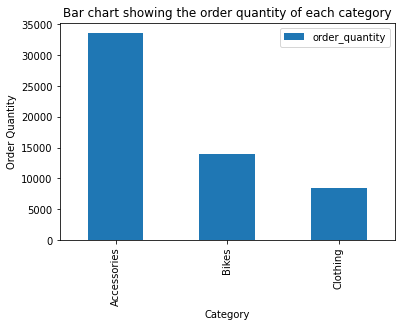

In [57]:
# Then, we'll make sure our plotting object is cleared
plt.clf()

# Then, we'll create a plot showing the order quantity for each category
ax = data_to_plot.plot.bar(x = 'category_name', y = 'order_quantity')

# Then, we'll set the plot title, x and y axis labels
ax.set_title('Bar chart showing the order quantity of each category')
ax.set_xlabel("Category")
ax.set_ylabel("Order Quantity")

# Then, we'll save the plot into a directory called 'plots/'
plt.savefig('./plots/bar.png')

In [58]:
##########
# 7.2 TIME SERIES
##########

# In this example, we will plot the daily sales for Road Bikes, Mountain Bikes, Touring Bikes over time

# First, let's look at the data type of our 'order_date' column (this column contains date information)
print(sales_df['order_date'].dtypes) # Result is 'object' meaning the column contains strings

object


In [59]:
# In order to plot the data over time, we need to convert the column from a string to a datetime type,
# which can be plotted as a time series. Let's also convert the dates into month bins by setting each
# day to the first of the month, in order to make the visualization easier to interpret.

# We will use a lambda function to do this :)

sales_df['order_date'] = sales_df['order_date'].progress_apply(lambda x: pd.to_datetime(x))

100%|██████████| 56046/56046 [00:10<00:00, 5469.54it/s]


In [60]:
print(sales_df['order_date'].dtypes)

datetime64[ns]


In [61]:
bikes_df = sales_df[sales_df['category_name'] == 'Bikes']

In [62]:
# Next, we'll keep only the columns we need
filtered_df = bikes_df[['order_date', 'subcategory_name', 'order_quantity']]
filtered_df.head()

,order_date,subcategory_name,order_quantity
0,2015-01-01,Road Bikes,1
1,2015-01-01,Road Bikes,1
2,2015-01-01,Mountain Bikes,1
3,2015-01-01,Road Bikes,1
4,2015-01-02,Road Bikes,1


In [63]:
filtered_df['subcategory_name'].unique()

array(['Road Bikes', 'Mountain Bikes', 'Touring Bikes'], dtype=object)

In [64]:
# Next, we'll group first by 'order_date', then by 'subcategory_name', 
# and sum the only remaining column 'order_quantity'
total_bikes_df = filtered_df.groupby(['order_date', 'subcategory_name']).agg('sum').reset_index()
# total_sales_df = total_sales_df.sort_values(by = ['order_date'])
# Let's look at what our data now looks like
total_bikes_df.head()

,order_date,subcategory_name,order_quantity
0,2015-01-01,Mountain Bikes,1
1,2015-01-01,Road Bikes,3
2,2015-01-02,Road Bikes,4
3,2015-01-03,Mountain Bikes,3
4,2015-01-03,Road Bikes,5


In [65]:
total_bikes_df.dtypes

order_date          datetime64[ns]
subcategory_name            object
order_quantity               int64
dtype: object

In [66]:
# Now, we need to pivot the dataframe to get it in the right shape for plotting
pivoted_sales_df = total_bikes_df.pivot_table(index='order_date', values='order_quantity', columns='subcategory_name')
# Let's look at what our data now looks like
pivoted_sales_df.head()

subcategory_name,Mountain Bikes,Road Bikes,Touring Bikes
order_date,,,
2015-01-01,1.0,3.0,NaN
2015-01-02,NaN,4.0,NaN
2015-01-03,3.0,5.0,NaN
2015-01-04,1.0,4.0,NaN
2015-01-05,NaN,3.0,NaN


In [67]:
pivoted_sales_df = pivoted_sales_df.fillna(0)
pivoted_sales_df.head()

subcategory_name,Mountain Bikes,Road Bikes,Touring Bikes
order_date,,,
2015-01-01,1.0,3.0,0.0
2015-01-02,0.0,4.0,0.0
2015-01-03,3.0,5.0,0.0
2015-01-04,1.0,4.0,0.0
2015-01-05,0.0,3.0,0.0


<Figure size 432x288 with 0 Axes>

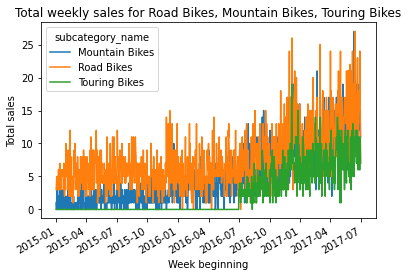

In [68]:
# Finally, we're ready to plot
# We clear the plot area, plot our data on the axis, add labels, and save the figure
plt.clf()
ax = pivoted_sales_df.plot()
ax.set_title('Total weekly sales for Road Bikes, Mountain Bikes, Touring Bikes')
ax.set_xlabel("Week beginning")
ax.set_ylabel("Total sales")
plt.savefig('plots/time_series.png')

In [69]:
# An easier to visualize way to plot this data

pivoted_sales_df = pivoted_sales_df.cumsum(axis = 0)
pivoted_sales_df.head()

subcategory_name,Mountain Bikes,Road Bikes,Touring Bikes
order_date,,,
2015-01-01,1.0,3.0,0.0
2015-01-02,1.0,7.0,0.0
2015-01-03,4.0,12.0,0.0
2015-01-04,5.0,16.0,0.0
2015-01-05,5.0,19.0,0.0


<Figure size 432x288 with 0 Axes>

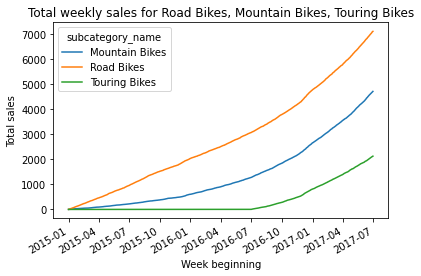

In [70]:
# Finally, we're ready to plot
# We clear the plot area, plot our data on the axis, add labels, and save the figure
plt.clf()
ax = pivoted_sales_df.plot()
ax.set_title('Total weekly sales for Road Bikes, Mountain Bikes, Touring Bikes')
ax.set_xlabel("Week beginning")
ax.set_ylabel("Total sales")
plt.savefig('plots/time_series.png')

<Figure size 432x288 with 0 Axes>

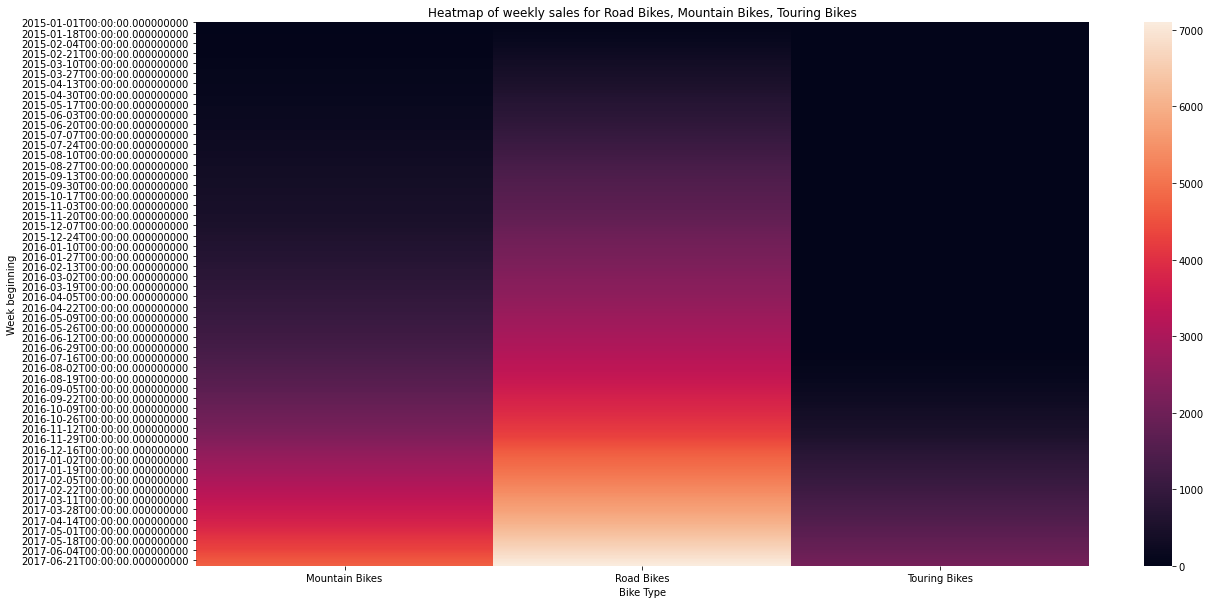

In [71]:
##########
# 7.3 HEAT MAP
##########

# Another plotting option is a heat map 

# We import a supporting library and prepare the plot area
import seaborn as sns
plt.clf()
plt.figure(figsize=(20,10)) # This explicity sets the size of the plot area (2x as wide as tall)
ax = plt.axes()

# Then we plot the data, add labels, and save the figure
sns.heatmap(pivoted_sales_df, ax = ax)
ax.set_title('Heatmap of weekly sales for Road Bikes, Mountain Bikes, Touring Bikes')
ax.set_xlabel("Bike Type")
ax.set_ylabel("Week beginning")
plt.savefig('plots/heatmap.png')

In [72]:
##########
# 7.4 SCATTER PLOT
##########

# Let's plot month vs total sales amount 
new_sales_df = sales_df
new_sales_df['revenue'] = sales_df.apply(lambda x: x['order_quantity'] * x['product_price'], axis = 1)
# new_sales_df['revenue'] = sales_df.apply(lambda x: , axis = 1)

# Let's see if the month has an effect on the amount of revenue
rev = new_sales_df.groupby(new_sales_df.order_date.dt.month).agg('revenue').sum().reset_index()
rev

,order_date,revenue
0,1,2.292117e+06
1,2,2.345630e+06
2,3,2.563994e+06
3,4,2.676135e+06
4,5,2.973293e+06
5,6,3.030801e+06
6,7,1.301471e+06
7,8,1.340646e+06
8,9,1.296806e+06
9,10,1.434098e+06


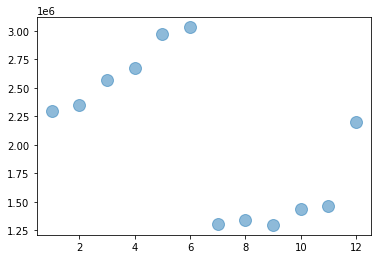

In [73]:
fig, ax = plt.subplots()
ax.plot(rev.order_date, rev.revenue, marker='o', linestyle='', ms=12, alpha = 0.5)
plt.savefig('plots/scatter_plot.png')

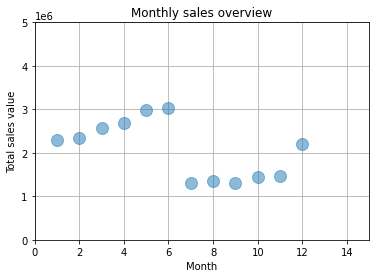

In [74]:
##########
# 7.5 SCATTER PLOT WITH NICER FORMATTING
##########

# Matplotlib allows for an extensive amount of formatting customization
# Options include, but are certainly not limited to: graph title, axis titles, grid, axis range, legend position
fig, ax = plt.subplots()

# And axis (data series) title
ax.set_title('Monthly sales overview')
# Make the grid visible
ax.grid(True)
# Set the x axis label and range
ax.set_xlabel('Month')
ax.set_xlim((0, 15))
# Set the y axis label and range
ax.set_ylabel('Total sales value')
ax.set_ylim((0, 5000000))

ax.plot(rev.order_date, rev.revenue, marker='o', linestyle='', ms=12, alpha = 0.5)

# Now we'll save the new version and compare to the previous one
plt.savefig('plots/scatter_plot_new.png')

In [75]:
########################
# 8. ACTIVITIES
########################

customer_df = pd.read_csv('./data/customers_data.csv')

# Let's switch to the customers dataset for the activities. First we have to turn the annual_income
# column from a type string into a type integer
def salary_transform(string):
    s = string.replace('$', '')
    s = s.replace(',', '')
    return int(s)

customer_df['annual_income'] = customer_df['annual_income'].apply(lambda x: salary_transform(x))

##########
# 8.1 ACTIVITY 1
##########

# Using the customer_df:
# 1. Which 'occupation' has the HIGHEST MEAN and MEDIAN 'annual_income' value? And what are the values? 
# Hint: it's the same occupation.

# 2. For the occupation you found in step 1, how many rows in customer_df does it appear in?

###
# YOUR CODE HERE

# customer_df.groupby(.agg(['mean', 'median'])
customer_df.groupby('occupation')['annual_income'].agg(['mean', 'median'])
occ = 'Management'

len(customer_df[customer_df['occupation'] == 'Management'])

###

# Correct results for step 1: occupation = Management, mean = 92118.53, median = 90000
# Correct results for step 2: 3011 rows

3011

In [76]:
##########
# 8.2 ACTIVITY 2
##########

sales_df = pd.read_csv('./data/sales_data_all.csv')

# Using the sales_df:
# 1. Use a lambda function to compute ('product_price' - 'product_cost') for each row
#    Then, sum all of the resulting values to compare with the correct answer below
# 2. Use a lambda function and subsequent aggregation to compute how many more characters, 
#    on average (mean), the 'product_description' column has compared to the 'product_name' 

###
# YOUR CODE HERE

print(sales_df.apply(lambda x : x['product_price'] - x['product_cost'], axis = 1).sum())
print(sales_df.apply(lambda x : len(x['product_description']) - len(x['product_name']), axis = 1).agg('mean'))

###

# Correct answer for step 1: 10268688.964499999
# Correct answer for step 2: 55.49814438140099

10268688.964499999
55.49814438140099
